Lab 13: Clustering

Kobie Williams 

3/29/2022 

The purpose is to experiment with using K-means algorithm for clustering 

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import image as img
from skimage.transform import resize

In [40]:
image_path = '/content/UncBasketball.png'
image = img.imread(image_path) 

if image is None: 
  print('********************************************')
  print('*** Unable to load image', image_path)
  print('********************************************\n') 
image.shape 


(750, 1110, 4)

Image loaded ( 750 x 1110 )


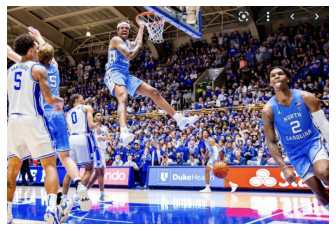

In [41]:
# Resize to make things faster
# You can play with what fraction to use for resizing.
#image = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
               #anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# get the height, width, and number of color channels (3)
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [42]:
# reshape the image to be a list of pixels
# each pixel is a row with 3 columns (R G B)
pixels = image.reshape((h * w, 4))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]

pixels is (832500, 4)


array([[0.57254905, 0.49411765, 0.36862746, 1.        ],
       [0.47843137, 0.4       , 0.27450982, 1.        ],
       [0.41960785, 0.3372549 , 0.21960784, 1.        ],
       [0.3529412 , 0.26666668, 0.15686275, 1.        ],
       [0.3137255 , 0.22352941, 0.12156863, 1.        ]], dtype=float32)

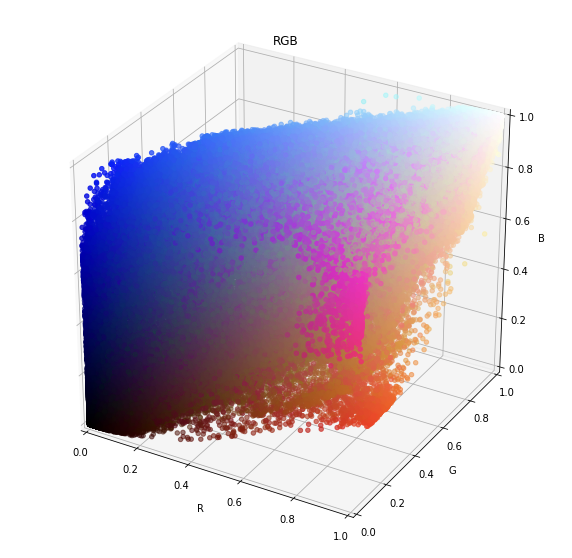

In [43]:
#Show 3D plot of all the pixels in terms of red, green, and blue 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()

In [44]:
# cluster the pixel intensities
k = 6
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')

# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)

Running Kmeans on list of 832500 pixels with k = 6 ...
Kmeans complete


In [45]:
print('These are the locations of the cluster centers (R G B)')
clt.cluster_centers_


These are the locations of the cluster centers (R G B)


array([[0.35000378, 0.26328987, 0.24635956, 1.        ],
       [0.66789496, 0.46738452, 0.41330245, 1.        ],
       [0.88880783, 0.8606826 , 0.8780221 , 1.        ],
       [0.15983891, 0.2786228 , 0.75095016, 1.        ],
       [0.08966437, 0.06045273, 0.09866032, 1.        ],
       [0.5858404 , 0.61935127, 0.8219422 , 1.        ]], dtype=float32)

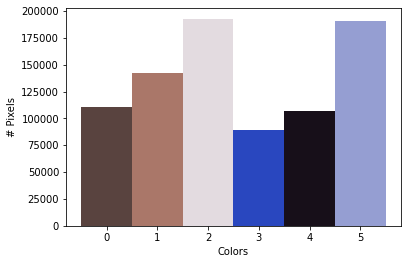

In [46]:
# Get the list of cluster centers
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()

[[0.66789496 0.46738452 0.41330245 1.        ]
 [0.35000378 0.26328987 0.24635956 1.        ]
 [0.35000378 0.26328987 0.24635956 1.        ]
 [0.35000378 0.26328987 0.24635956 1.        ]
 [0.35000378 0.26328987 0.24635956 1.        ]]


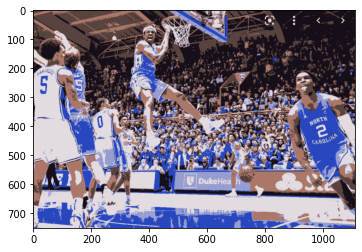

In [47]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()

k) i. I picked this value of k because this was the lowest I'd go where I still thought that it would look cool on a t-shirt and the run time was also very fast. 

ii. The value of k affects the runtime of the algorithm because k decides how many clusters there will be which corresponds to how many different colors will be presented. With more decision making on the clusters for the algorithm, comes more time it takes to decide. 

iii. The number of points or pixels to be clustered affect the run time because the more of them that need to be decided by whatever k number we have, means the more time it takes to cluster for the alg. 



In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bQkDQn0CTYOTMfk32Yp98TKdKn3JSAE8')
df.head(10)

,state,temp,snowfall
0,AL,46.5,1.6
1,AK,2.6,74.5
2,AZ,43.6,0.3
3,AR,41.5,5.2
4,CA,46.2,0.0
5,CO,25.8,19.1
6,CT,28.5,40.5
7,DE,36.1,20.2
8,FL,59.4,0.0
9,GA,47.8,0.7


In [59]:
data = df[['temp', 'snowfall']] 
data.head(5)

,temp,snowfall
0,46.5,1.6
1,2.6,74.5
2,43.6,0.3
3,41.5,5.2
4,46.2,0.0


In [64]:
print('Running Kmeans on list of', df.shape[0], 'states...')

# TO DO -----------

# Create a KMeans model with k clusters
k = 3
clt = KMeans(n_clusters=k) 


# Fit the model to the data (just temp and snowfall)

clt.fit(data) 

# Predict the cluster labels based on the data
cluster_labels = clt.predict(data)

Running Kmeans on list of 50 states...


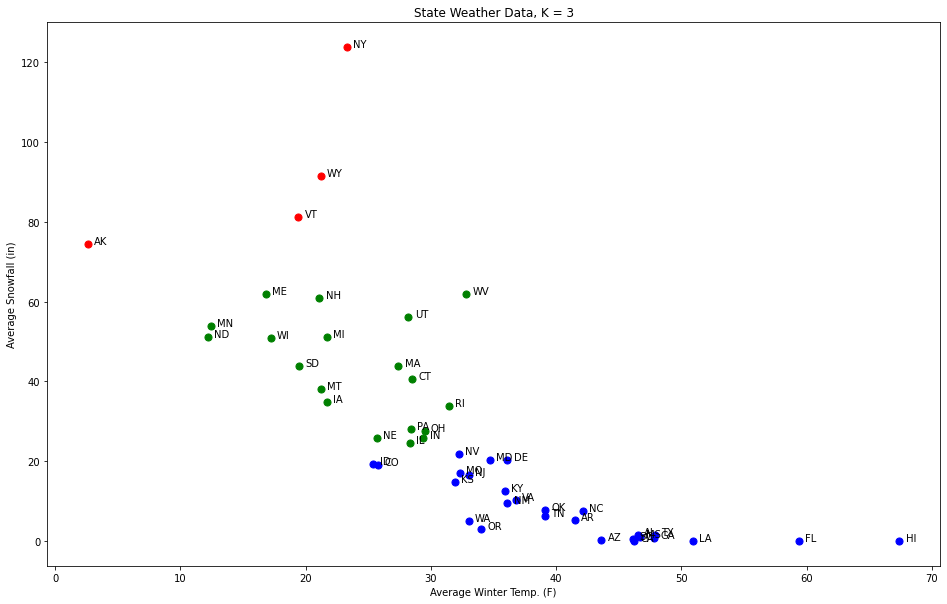

In [65]:
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = ' + str(k))
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

Group 1) Extreme Cold and Snowfall 

Group 2) Medium Cold and Snowfall 

Group 3) Low Cold and Snowfall 

I divided it into three groups because I saw that group 2 and 3 have a close to similar amount of states with a certain range in weather. Group 1 was just such an outlier that I had to make them a whole separate group. 

ii) We could encourage kmeans to group together states that are near each other by doing some type of horizontal calculation. What I'm seeing is that most states that are near each other geographically are close together on the x-axis. 